## Test fitting a simple logistic regression model.

In [1]:
# Loading Data.
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv", index_col=None)
# Split values and class for convenience.
X, Y = train.iloc[:,1:], train["Class"]
train.head(10)

,Class,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC plot and AUC statistic, based on the code from the following source:
########################################
# Title: Tutorial 3-Titanic3 Cross-validation with ROC analysis
# Author: Chuan Lu
# Date: 06/04/2017
# Code Version: 47c58c0
# Available: https://github.com/aberML/CSM6420/
########################################

# (Hacked together, but does the job ;-) )
mean_acc = 0.0
mean_auc = 0.0
all_tpr = []
all_acc = []
all_auc = []

i=0

def ROC_AUC(y_test, y_prob):
    global i, mean_acc, mean_auc, all_tpr, all_acc, all_auc
    i += 1
    # Get prediction on class label from the model
    y_prediction = np.around(y_prob, decimals=0)
    
    # Get probability output from the model
    acc = np.sum(y_test == y_prediction)*1./len(y_test)
    print("Prediction accuracy:", acc)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print("Area under ROC curve (AUC):", roc_auc)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))    
    all_acc.append(acc)
    all_auc.append(roc_auc)
    return acc, roc_auc

def display_plot(title = 'Receiver operating characteristic example'):
    global i, mean_acc, mean_auc, all_tpr, all_acc, all_auc
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    all_acc=np.asarray(all_acc)
    all_auc=np.asarray(all_auc)
    print(all_acc)
    # print 95% C.I. for both accuracy and AUC based on CV
    print("Mean Accuracy: %0.3f (+/- %0.3f)" % (all_acc.mean(), all_acc.std() * 1.96))
    print(all_auc)
    print("Mean AUC: %0.3f (+/- %0.3f)" % (all_auc.mean(), all_auc.std() * 1.96))
    
    # Reset values for re-use.
    mean_acc = 0.0
    mean_auc = 0.0
    all_tpr = []
    all_acc = []
    all_auc = []

    i=0


/home/james/anaconda3/envs/anacenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Shape of training:
X: (874, 1024) y: (874,)
Shape of testing:
X: (126, 1024) y: (126,)
Prediction accuracy: 0.8333333333333334
Area under ROC curve (AUC): 0.8857638888888889
0.8333333333333334 0.8857638888888889
Shape of training:
X: (874, 1024) y: (874,)
Shape of testing:
X: (126, 1024) y: (126,)
Prediction accuracy: 0.8571428571428571
Area under ROC curve (AUC): 0.8822916666666666
0.8571428571428571 0.8822916666666666
Shape of training:
X: (875, 1024) y: (875,)
Shape of testing:
X: (125, 1024) y: (125,)
Prediction accuracy: 0.856
Area under ROC curve (AUC): 0.9014035087719299
0.856 0.9014035087719299
Shape of training:
X: (875, 1024) y: (875,)
Shape of testing:
X: (125, 1024) y: (125,)
Prediction accuracy: 0.896
Area under ROC curve (AUC): 0.9152631578947369
0.896 0.9152631578947369
Shape of training:
X: (875, 1024) y: (875,)
Shape of testing:
X: (125, 1024) y: (125,)
Prediction accuracy: 0.88
Area under ROC curve (AUC): 0.9249122807017545
Shape of training:
X: (875, 1024) y: (875,)


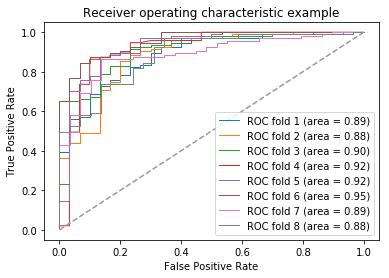

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import StratifiedKFold as SKFold

model = LogisticRegression()

random_seed = 1234
scv = SKFold(y=Y, n_folds=8, random_state=random_seed)

best_acc = best_auc = 0

for training_set, test_set in scv:  
    X_train = X.iloc[training_set]
    y_train = Y.iloc[training_set]
    X_test = X.iloc[test_set]
    y_test = Y.iloc[test_set]
    print("Shape of training:")
    print("X:", X_train.shape, "y:", y_train.shape)
    print("Shape of testing:")
    print("X:", X_test.shape, "y:", y_test.shape)

    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_test)[:,1]

    # Plot.
    acc, roc_auc = ROC_AUC(y_test, y_pred)
    
    if acc + roc_auc > best_auc + best_acc:
        # Save predictions for the best result.
        best_acc = acc
        best_auc = roc_auc

        # Prepare test predictions for submission.
        test = pd.read_csv("test.csv")
        X_test, Id = test.iloc[:,1:], test["TestId"]

        Y_pred = model.predict_proba(X_test)[:,1]

        pred_df = pd.DataFrame(Id)
        pred_df = pred_df.join(pd.DataFrame({"PredictedScore": Y_pred}))
        pred_df.to_csv("predlogr.csv", index = False)
        print(acc, roc_auc)

display_plot()
plt.savefig("ROC_lr.pdf")

In [4]:
import sys
import pandas as pd
import sklearn
print('Python: ', sys.version_info)
print('Pandas: ', pd.__version__)
print('Sklearn: ', sklearn.__version__)

Python:  sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
Pandas:  0.22.0
Sklearn:  0.19.1
